In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
heart = pd.read_csv('heart_2020_final2.csv')#import data

In [28]:
heart.drop(heart.filter(regex="Unname"),axis=1, inplace=True) 

In [29]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,0,1,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,0,0,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,0,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,0,0,8,0,0,0


In [30]:
#CREATE A NEW DATAFRAME ONLY FOR PATIENTS
patients= heart.loc[heart['HeartDisease'] == 1]
patients.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6,0,1,0,11,1,0,12,0,0,0
10,1,34.30,1,0,0,30,0,1,1,8,0,1,15,1,0,0
35,1,32.98,1,0,1,10,0,1,1,11,0,1,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,12,0,1,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,11,0,1,8,0,1,0


In [31]:
#CREATE A NEW DATAFRAME ONLY FOR NON-PATIENTS
nonpatients= heart.loc[heart['HeartDisease'] == 0]
nonpatients.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,0,1,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,0,0,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,0,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,0,0,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,0,0,8,0,0,0


In [32]:
df=heart.groupby(['HeartDisease']) #count patients vs. non-patients
df['HeartDisease'].count()

HeartDisease
0    292422
1     27373
Name: HeartDisease, dtype: int64

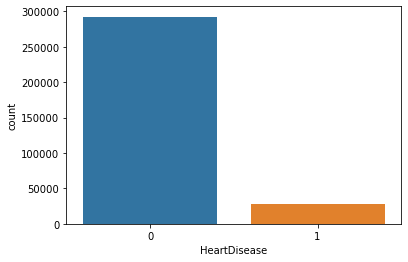

In [33]:
plot= sns.countplot(x="HeartDisease",data=heart); 
fig= plot.get_figure()
fig.savefig("countplot.png")

Sex
0    167805
1    151990
Name: HeartDisease, dtype: int64

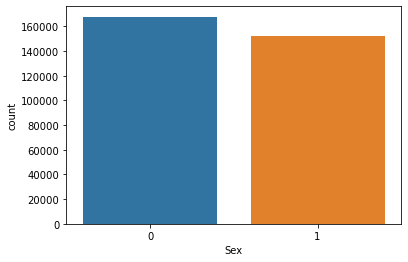

In [91]:
sns.countplot(x="Sex",data=heart) #count of males and females
df=heart.groupby(['Sex'])
df['HeartDisease'].count()

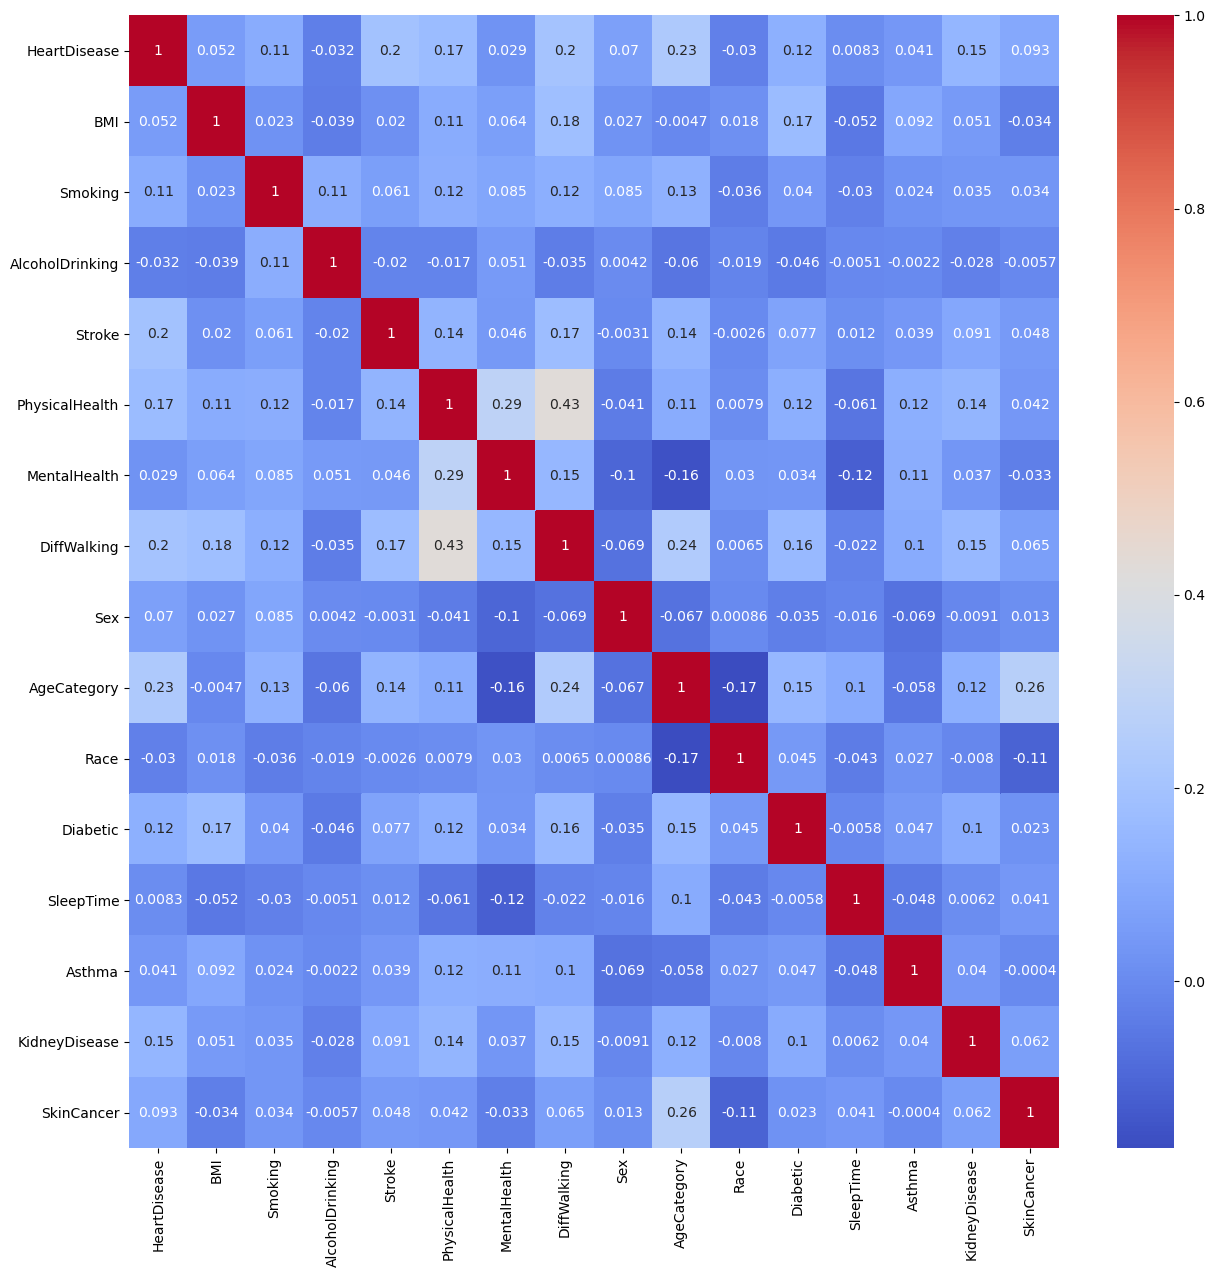

In [92]:
fig = plt.figure(figsize=(15,15), dpi=100) #corellation map 

plot =sns.heatmap(heart.corr(),cmap='coolwarm',annot=True)
figure= plot.get_figure()

figure.savefig("Correlation.png")

In [36]:
# BMI

/Users/tanembasaraner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


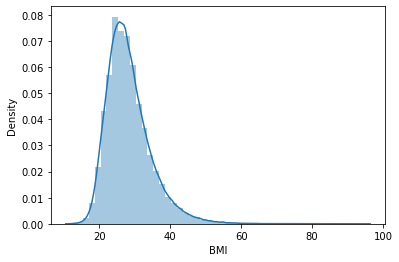

In [37]:
plot=sns.distplot(heart['BMI']) #graph for BMI of participants
fig= plot.get_figure()
fig.savefig("bmi_distplot.png")

/Users/tanembasaraner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tanembasaraner/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


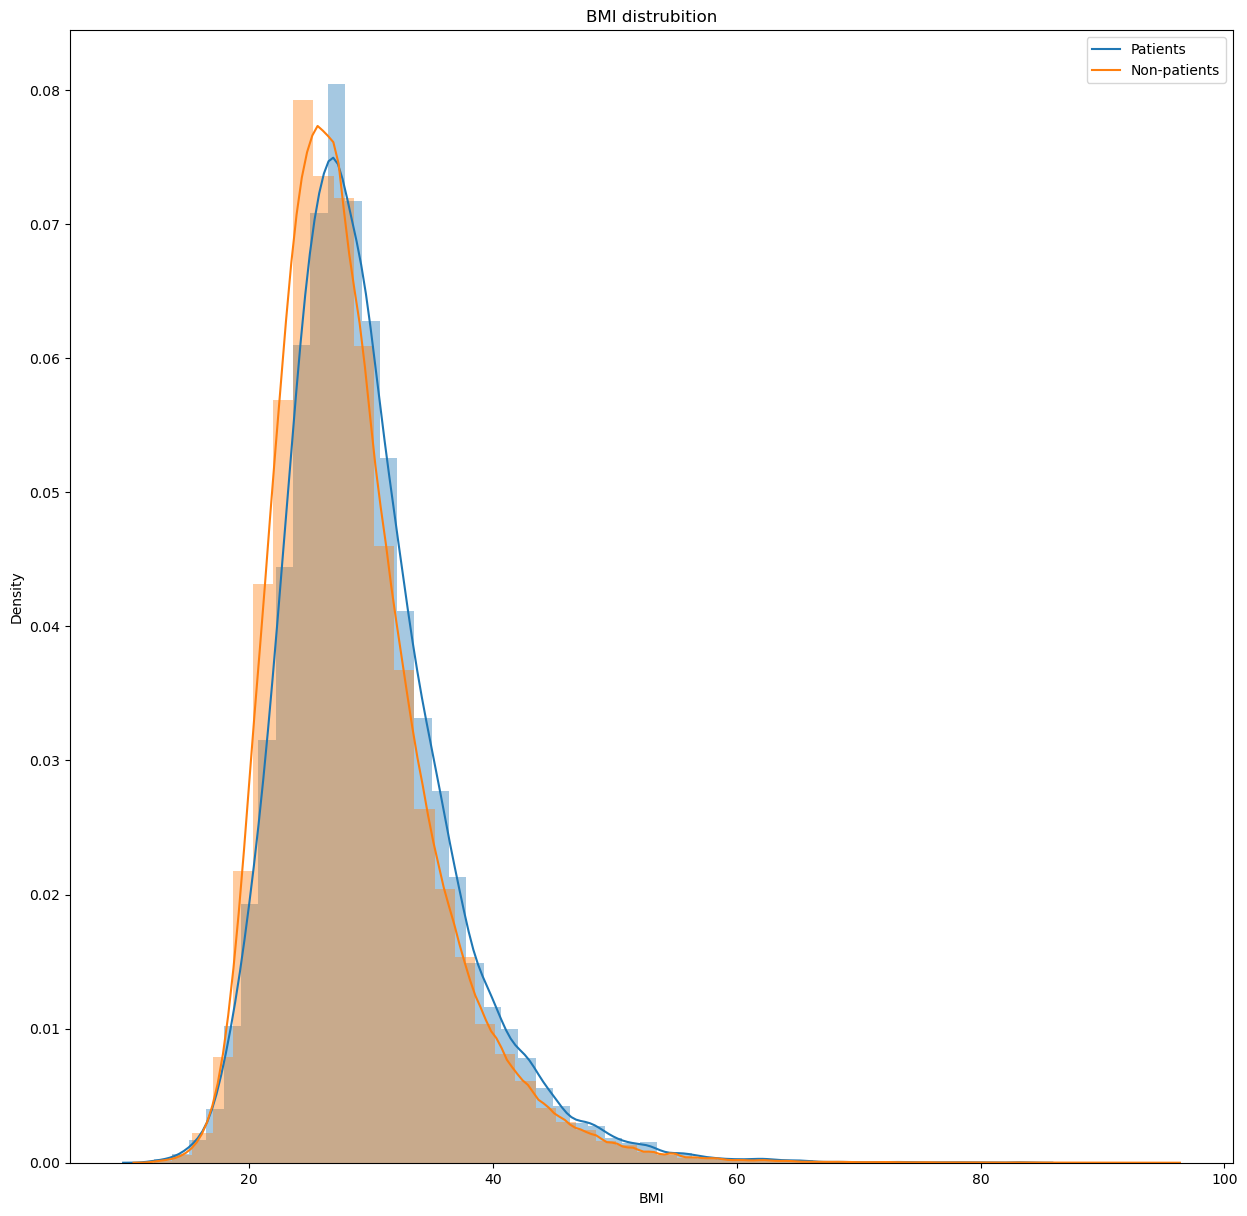

In [39]:
fig = plt.figure(figsize=(15,15), dpi=100) #BMI of patients vs. non-patients

plot=sns.distplot(patients['BMI'])
sns.distplot(heart['BMI'])
plt.legend(labels=["Patients","Non-patients"])

#graph for BMI of participants
fig= plot.get_figure()
plot.set_title('BMI distrubition')

fig.savefig("patientBMI_distplot.png")

In [40]:
heart['BMI'].mean()

28.325398520926328

In [41]:
patients['BMI'].mean()

29.40159207978655

In [42]:
nonpatients['BMI'].mean()

28.22465833623946

In [45]:
#bmi average for males and females
df=heart.groupby(['Sex']) 
df['BMI'].mean()


Sex
0    28.162436
1    28.505317
Name: BMI, dtype: float64

In [46]:
df=heart.groupby(['HeartDisease']) #BMI percentage of heart disease patients and non-patients
df['BMI'].mean()

HeartDisease
0    28.224658
1    29.401592
Name: BMI, dtype: float64

In [ ]:
# SMOKING

In [48]:
df=heart.groupby(['Smoking','HeartDisease']) #counts of patients/non-patients who smoke/ don't smoke
df['Smoking'].count()

Smoking  HeartDisease
0        0               176551
         1                11336
1        0               115871
         1                16037
Name: Smoking, dtype: int64

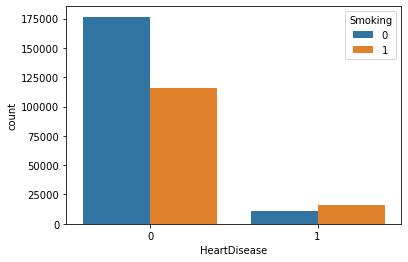

In [49]:
plot = sns.countplot(x='HeartDisease',data= heart,hue='Smoking')#counts of patients/non-patients who smoke/ don't smoke
fig= plot.get_figure()
fig.savefig("Smoking_count.png")


In [50]:
#ALCOHOL

In [51]:
df=heart.groupby(['AlcoholDrinking','HeartDisease'])#counts of patients/non-patients who drink/ don't drink
df.count()

BMI  Smoking  Stroke  PhysicalHealth  \
AlcoholDrinking HeartDisease                                            
0               0             271786   271786  271786          271786   
                1              26232    26232   26232           26232   
1               0              20636    20636   20636           20636   
                1               1141     1141    1141            1141   

                              MentalHealth  DiffWalking     Sex  AgeCategory  \
AlcoholDrinking HeartDisease                                                   
0               0                   271786       271786  271786       271786   
                1                    26232        26232   26232        26232   
1               0                    20636        20636   20636        20636   
                1                     1141         1141    1141         1141   

                                Race  Diabetic  SleepTime  Asthma  \
AlcoholDrinking HeartDisease                                        
0               0             271786    271786     271786  271786   
                1              26232     26232      26232   26232   
1               0              20636     20636      20636   20636   
                1               1141      1141       1141    1141   

                              KidneyDisease  SkinCancer  
AlcoholDrinking HeartDisease                             
0               0                    271786      271786  
                1                     26232       26232  
1               0                     20636       20636  
                1                      1141        1141

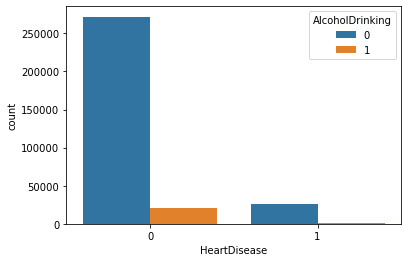

In [52]:
plot = sns.countplot(x='HeartDisease',data= heart,hue='AlcoholDrinking'))#counts of patients/non-patients who drink/ don't drink
fig= plot.get_figure()
fig.savefig("Alcohol_count.png")

In [ ]:
#STROKE

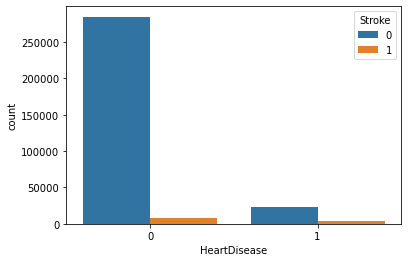

In [53]:
plot = sns.countplot(x='HeartDisease',data= heart,hue='Stroke')
fig= plot.get_figure()
fig.savefig("stroke_count.png")

In [54]:
df=heart.groupby(['Stroke','HeartDisease'])
df.count()

BMI  Smoking  AlcoholDrinking  PhysicalHealth  \
Stroke HeartDisease                                                     
0      0             284742   284742           284742          284742   
       1              22984    22984            22984           22984   
1      0               7680     7680             7680            7680   
       1               4389     4389             4389            4389   

                     MentalHealth  DiffWalking     Sex  AgeCategory    Race  \
Stroke HeartDisease                                                           
0      0                   284742       284742  284742       284742  284742   
       1                    22984        22984   22984        22984   22984   
1      0                     7680         7680    7680         7680    7680   
       1                     4389         4389    4389         4389    4389   

                     Diabetic  SleepTime  Asthma  KidneyDisease  SkinCancer  
Stroke HeartDisease                                                          
0      0               284742     284742  284742         284742      284742  
       1                22984      22984   22984          22984       22984  
1      0                 7680       7680    7680           7680        7680  
       1                 4389       4389    4389           4389        4389

In [55]:
#PHYSICAL HEALTH

In [57]:
df=heart.groupby(['HeartDisease'])
df['PhysicalHealth'].mean()


HeartDisease
0    2.956416
1    7.808242
Name: PhysicalHealth, dtype: float64

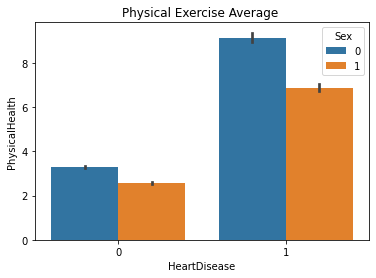

In [58]:
plot= sns.barplot(x="HeartDisease",y='PhysicalHealth',hue='Sex', data=heart) #Physical health average
plot.set_title('Physical Exercise Average ')
fig= plot.get_figure()
fig.savefig("Barplot_PhysicalHealth.png")
#df.legend(labels= ["female","male"])

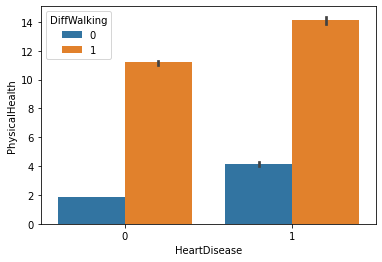

In [59]:
plot= sns.barplot(x="HeartDisease",y='PhysicalHealth',hue='DiffWalking', data=heart) #physical health- difficulty walking
fig= plot.get_figure()
fig.savefig("Diffwalking_barplot.png")

In [64]:
#MENTAL HEALTH

In [65]:
#Do patients struggle more with mental health issues?

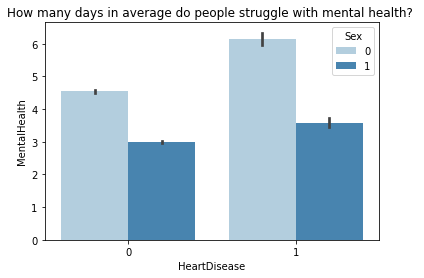

In [66]:
plot= sns.barplot(x="HeartDisease",palette = 'Blues',y='MentalHealth',hue='Sex', data=heart)
plot.set_title('How many days in average do people struggle with mental health? ')

fig= plot.get_figure()

fig.savefig("Mentalhealth_barplot.png")

In [1]:
# DIFFICULTY WALKING

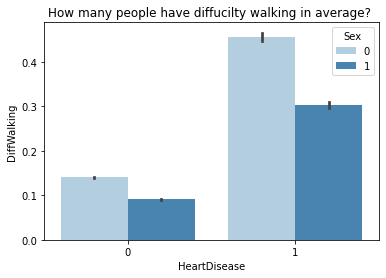

In [71]:
plot= sns.barplot(x="HeartDisease",palette = 'Blues',y='DiffWalking',hue='Sex', data=heart) #How many people have diffucilty walking in average? 
plot.set_title('How many people have diffucilty walking in average? ')

fig= plot.get_figure()

fig.savefig("DiffWalking_barplot.png")

In [72]:
#Age Category

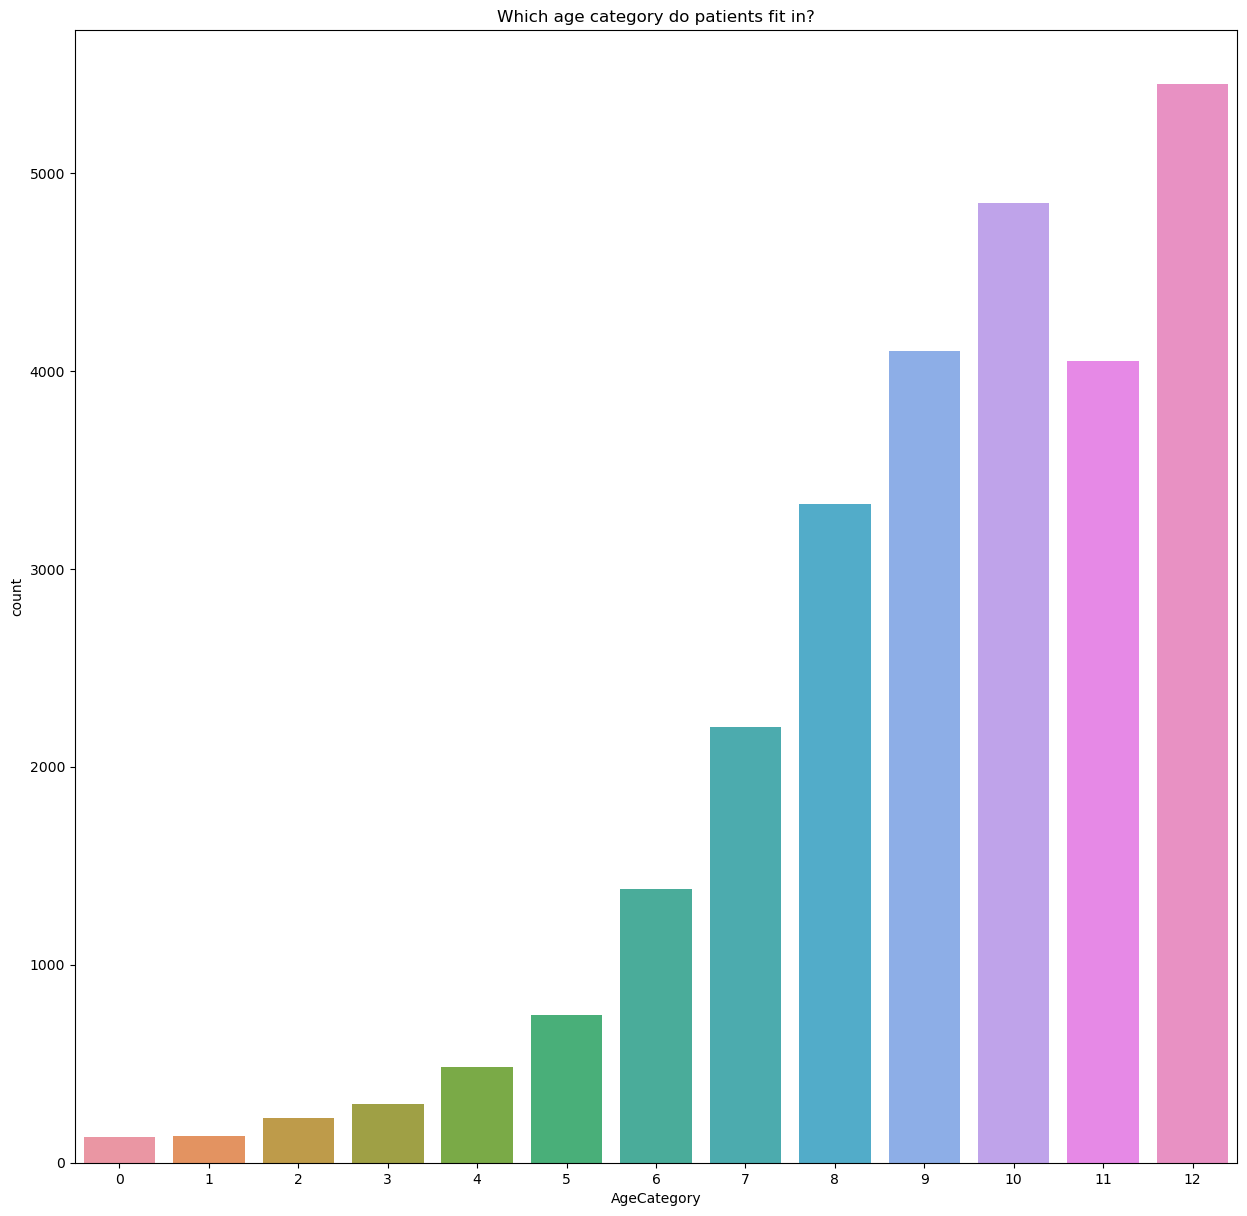

In [74]:
fig = plt.figure(figsize=(15,15), dpi=100) #Age category of heart disease patients

plot= sns.countplot(x="AgeCategory",data=patients);
plot.set_title('Which age category do patients fit in?')

fig= plot.get_figure()
fig.savefig("Agecategory.png")

In [ ]:
# RACE

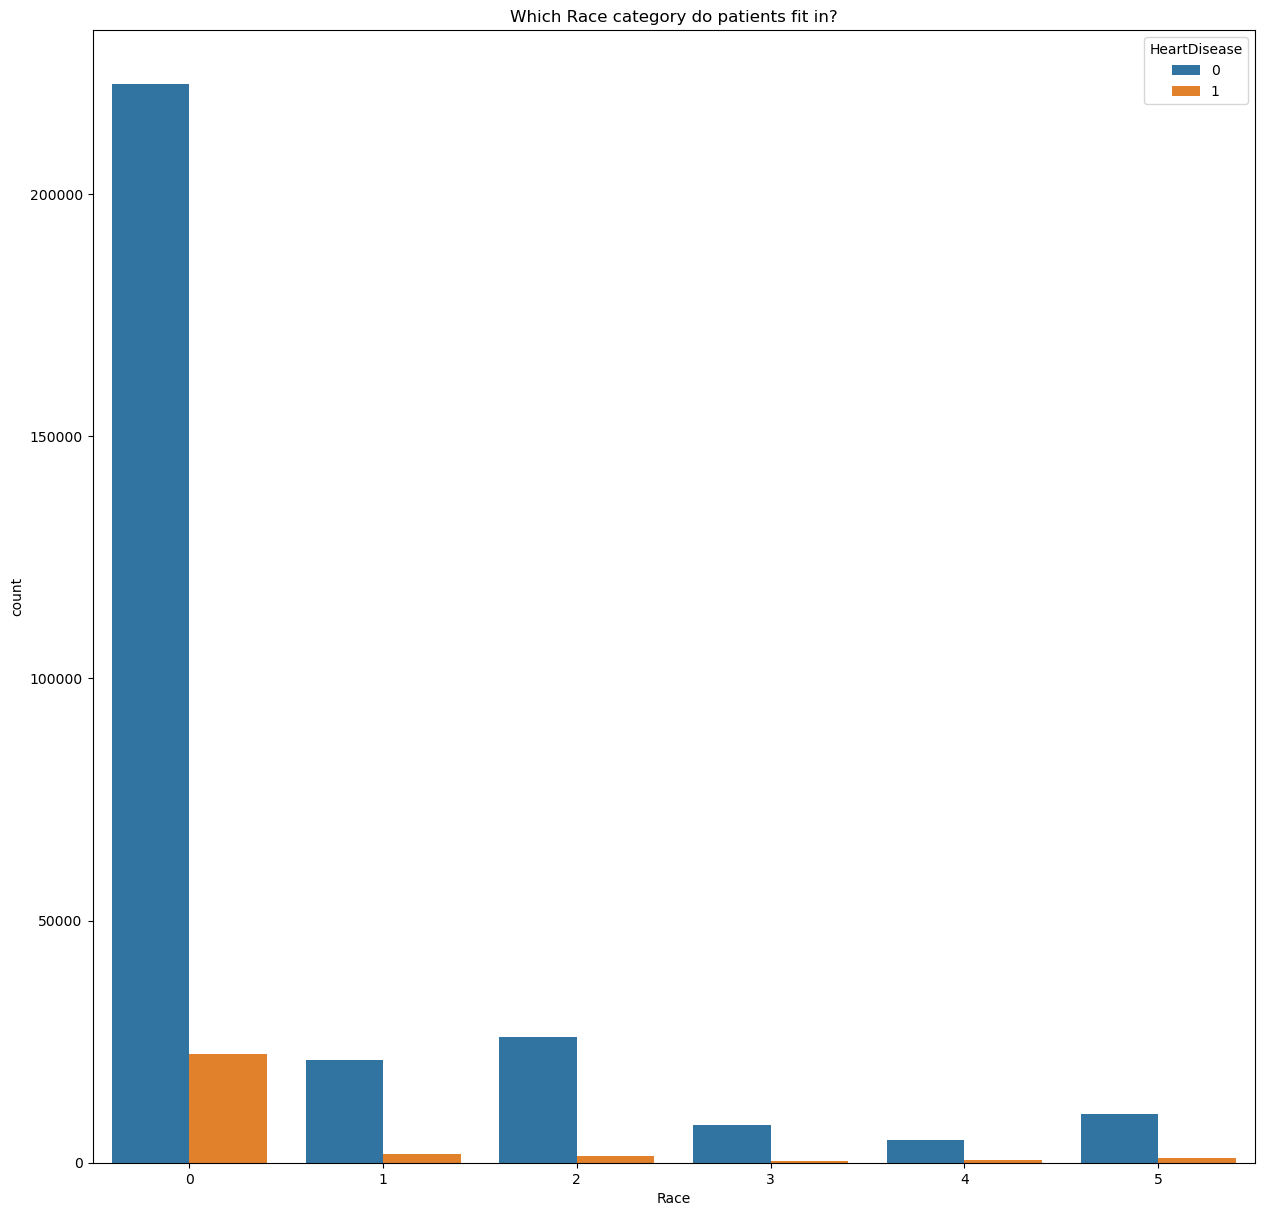

In [75]:
fig = plt.figure(figsize=(15,15), dpi=100) #race category of patients

plot= sns.countplot(x="Race",data=heart,hue="HeartDisease");
plot.set_title('Which Race category do patients fit in?')

fig= plot.get_figure()
fig.savefig("Race.png")


In [21]:
#DIABETIC 

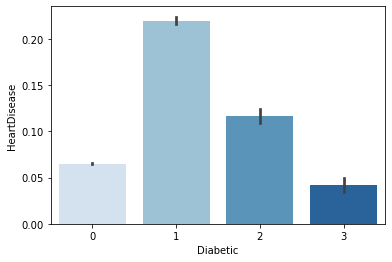

In [76]:
plot= sns.barplot(x="Diabetic",palette = 'Blues',y='HeartDisease', data=heart
                 )

fig= plot.get_figure()

fig.savefig("Diabetic_barplot.png")

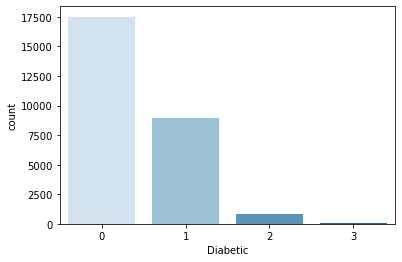

In [77]:
plot= sns.countplot(x="Diabetic",palette = 'Blues', data=patients)

fig= plot.get_figure()

fig.savefig("Diabetic_countplot.png")

In [78]:
#SLEEP

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

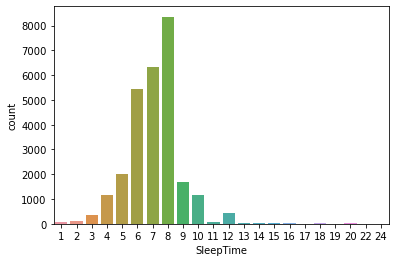

In [80]:
sns.countplot(data=patients, x="SleepTime") #sleep time distribution of partients 

In [82]:
#ASTHMA

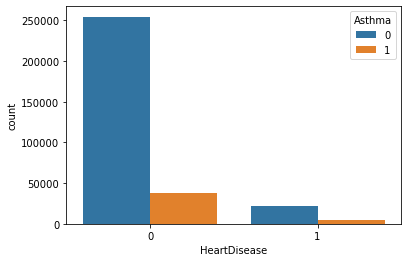

In [83]:
plot = sns.countplot(x='HeartDisease',data= heart,hue='Asthma') # asthma in patients vs non-patients
fig= plot.get_figure()
fig.savefig("Asthma_count.png")

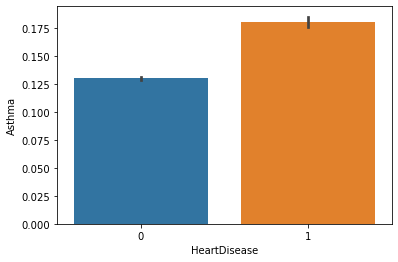

In [84]:
plot = sns.barplot(y='Asthma',x='HeartDisease',data= heart) # asthma in patients vs non-patients
fig= plot.get_figure()
fig.savefig("Asthma_mean.png")

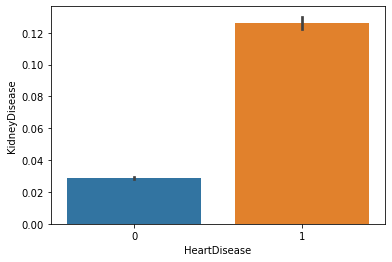

In [85]:
# Kidney Disease in patients vs non-patients
plot = sns.barplot(y='KidneyDisease',x='HeartDisease',data= heart)
fig= plot.get_figure()
fig.savefig("Kidney_mean.png")

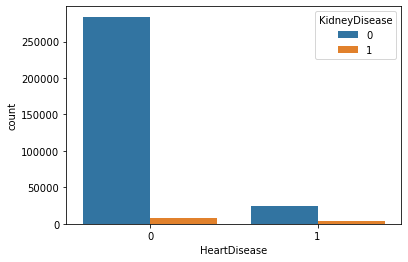

In [86]:
plot = sns.countplot(x='HeartDisease',data= heart,hue='KidneyDisease')
fig= plot.get_figure()
fig.savefig("Kidney_count.png")

In [87]:
#Skin Cancer 

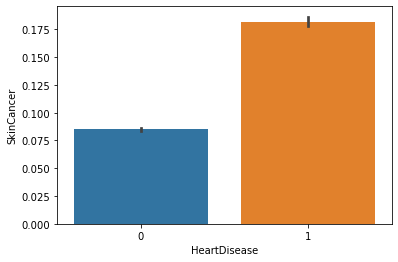

In [88]:
plot = sns.barplot(y='SkinCancer',x='HeartDisease',data= heart) # skin cancer in patients vs non-patients
fig= plot.get_figure()
fig.savefig("skincancer_mean.png")

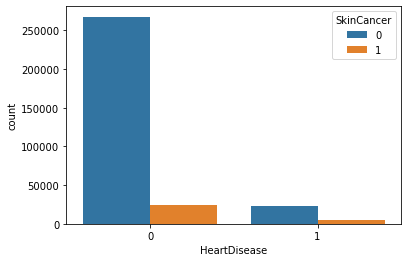

In [89]:
plot = sns.countplot(x='HeartDisease',data= heart,hue='SkinCancer')
fig= plot.get_figure()
fig.savefig("SkinCancer_count.png")